# ОИАД. Лабораторная работа №4

Используйте набор данных **datasets/famcs_students.csv**

binary_cols = [ss, interest, weekend_study, bad_sleep, glasses, anime, study_form, literature]

Исползуйте целевую переменную $y=$ binary_cols[N % 8], где $N$ - номер в списке группы. Остальные переменные используйте в качестве признаков $X$ (предикторов). Вы можете отобрать наиболее информативные (по вашему экспертному мнению) признаки, но не менее 5.

Необходимо построить несколько моделей бинарной классификации $y$ по признакам $X$.

Разделите случайно исходные данные на 3 выборки:
* тренировочная (70%) - для определения параметров модели
* валидацонная (15%) - для подбора гиперпараметров модели
* тестовую (15%) - итоговая оценка качества

## 0. Тривиальный классификатор
Всегда выдает наиболее частый класс

## 1. Наивный байесовский классификатор
Алгоритм реализуйте сами!

## 2. Метод k-ближайших соседей
Алгоритм реализуйте сами!
Подберите оптимальный гиперпараметр $k$.

## 3. Логистическая регрессия
Алгоритм реализуйте сами!
Изобразите график зависимости метрик precision, recall от порога классификаци, а итоговый порог классификации выберите таким, при котором достигается максимум метрики f1. Используйте валидационную выборку.

## 4. Оценка качества
Для каждой построенной модели, по отложенной тестовой выборке оцените качество моделей:
* accuracy
* precision
* recall
* roc-auc
* постройте матрицу ошибок
  



In [58]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


df = pd.read_csv("famcs_students.csv")

binary_cols = ["ss", "interest", "weekend_study", "bad_sleep",
               "glasses", "anime", "study_form", "literature"]

N = 27
target = binary_cols[N % 8]
y = df[target]
print(f"Целевая переменная: {target}")
X = df.drop(columns=[target])
print(f"Признаки - предикторы: {list(X.columns)}")


Целевая переменная: bad_sleep
Признаки - предикторы: ['cource', 'group', 'stream', 'sex', 'age', 'ss', 'interest', 'os', 'weekend_study', 'glasses', 'work_experience', 'ai', 'height', 'anime', 'social', 'sport', 'miss', 'study_form', 'foot_size', 'eye_color', 'score', 'retake', 'hostel', 'literature']


In [59]:
from sklearn.preprocessing import OrdinalEncoder

X_transformed = X.copy()


cat_columns = X_transformed.select_dtypes(include=["object"]).columns.tolist()

if cat_columns:
    encoder = OrdinalEncoder()
    X_transformed[cat_columns] = encoder.fit_transform(X_transformed[cat_columns].astype(str))

X_transformed = X_transformed.apply(pd.to_numeric)

X_transformed.info()

X = X_transformed
y = (y == "Да").astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Valid:", X_valid.shape)
print("Test:", X_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cource           127 non-null    int64  
 1   group            127 non-null    int64  
 2   stream           127 non-null    float64
 3   sex              127 non-null    float64
 4   age              127 non-null    float64
 5   ss               127 non-null    float64
 6   interest         127 non-null    float64
 7   os               127 non-null    float64
 8   weekend_study    127 non-null    float64
 9   glasses          127 non-null    float64
 10  work_experience  127 non-null    float64
 11  ai               127 non-null    float64
 12  height           127 non-null    float64
 13  anime            127 non-null    float64
 14  social           127 non-null    float64
 15  sport            127 non-null    float64
 16  miss             127 non-null    float64
 17  study_form      

## 0. Тривиальный классификатор
Всегда выдает наиболее частый класс


In [60]:
import numpy as np

majority_class = y_train.mode()[0]
print("Наиболее частый класс:", majority_class)


Наиболее частый класс: 1


In [61]:

y_test_pred_dummy = np.full_like(y_test, majority_class)
y_test_proba_dummy  = np.full(len(y_test), 1 if majority_class == 1 else 0)

In [62]:

accuracy_dummy_test = accuracy_score(y_test, y_test_pred_dummy)
precision_dummy_test = precision_score(y_test, y_test_pred_dummy)
recall_dummy_test = recall_score(y_test, y_test_pred_dummy)
roc_auc_dummy_test = roc_auc_score(y_test, y_test_proba_dummy)
conf_matrix_dummy_test = confusion_matrix(y_test, y_test_pred_dummy)

print(" Dummy classifier (TEST) metrics:")
print(f"Accuracy: {accuracy_dummy_test:.3f}")
print(f"Precision: {precision_dummy_test:.3f}")
print(f"Recall: {recall_dummy_test:.3f}")
print(f"ROC-AUC: {roc_auc_dummy_test:.3f}")
print("Confusion Matrix:")
print(conf_matrix_dummy_test)


 Dummy classifier (TEST) metrics:
Accuracy: 0.700
Precision: 0.700
Recall: 1.000
ROC-AUC: 0.500
Confusion Matrix:
[[ 0  6]
 [ 0 14]]


## 1. Наивный байесовский классификатор
Алгоритм реализуйте сами!


In [71]:
import numpy as np


class NaiveBayesClassifier:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self._mean = np.zeros((n_classes, n_features))
        self._var = np.zeros((n_classes, n_features))
        self._priors = np.zeros(n_classes)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0) + 1e-9
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def _gaussian_pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    def predict_proba(self, X):
        probs_list = []
        for x in X:
            posteriors = []
            for idx, c in enumerate(self.classes):
                prior = np.log(self._priors[idx])
                class_conditional = np.sum(np.log(self._gaussian_pdf(idx, x)))
                posteriors.append(prior + class_conditional)

            posteriors = np.array(posteriors)
            posteriors = np.exp(posteriors - np.max(posteriors))
            posteriors = posteriors / posteriors.sum()

            idx_1 = np.where(self.classes == 1)[0]
            if len(idx_1) > 0:
                probs_list.append(posteriors[idx_1[0]])
            else:
                probs_list.append(0.0)

        return np.array(probs_list)
    

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs > 0.5).astype(int)


In [64]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

nb = NaiveBayesClassifier()
nb.fit(X_train.values, y_train.values)


y_test_pred_nb = nb.predict(X_test.values)
y_test_proba_nb = nb.predict_proba(X_test.values)


accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
precision_nb = precision_score(y_test, y_test_pred_nb)
recall_nb = recall_score(y_test, y_test_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_test_proba_nb)
conf_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)


print(" Gaussian NB TEST:")
print(f"Accuracy: {accuracy_nb:.3f}")
print(f"Precision: {precision_nb:.3f}")
print(f"Recall: {recall_nb:.3f}")
print(f"ROC-AUC: {roc_auc_nb:.3f}")
print("Confusion Matrix:")
print(conf_matrix_nb)



 Gaussian NB TEST:
Accuracy: 0.300
Precision: 0.500
Recall: 0.071
ROC-AUC: 0.405
Confusion Matrix:
[[ 5  1]
 [13  1]]


/var/folders/96/pccrrdwj3nx7vlyr3xlcp_j40000gn/T/ipykernel_16122/3717293041.py:31: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self._gaussian_pdf(idx, x)))


## 2. Метод k-ближайших соседей
Алгоритм реализуйте сами!
Подберите оптимальный гиперпараметр $k$.

In [72]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):

        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict_one(self, x):
        distances = np.array([self._euclidean_distance(x, x_train) for x_train in self.X_train])
        neighbors_idx = np.argsort(distances)[:self.k]
        neighbor_labels = self.y_train[neighbors_idx]
        counts = np.bincount(neighbor_labels)
        return np.argmax(counts)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])


In [66]:
from sklearn.metrics import accuracy_score

#   k от 1 до 15
best_k = 1
best_acc = 0

for k in range(1, 16):
    knn = KNNClassifier(k=k)
    knn.fit(X_train.values, y_train.values)
    y_val_pred = knn.predict(X_valid.values)
    acc = accuracy_score(y_valid.values, y_val_pred)
    print(f"k={k}, Accuracy={acc:.3f}")
    
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"Лучший k = {best_k} с Accuracy = {best_acc:.3f}")


k=1, Accuracy=0.737
k=2, Accuracy=0.632
k=3, Accuracy=0.684
k=4, Accuracy=0.684
k=5, Accuracy=0.737
k=6, Accuracy=0.684
k=7, Accuracy=0.684
k=8, Accuracy=0.684
k=9, Accuracy=0.684
k=10, Accuracy=0.684
k=11, Accuracy=0.737
k=12, Accuracy=0.737
k=13, Accuracy=0.737
k=14, Accuracy=0.737
k=15, Accuracy=0.737
Лучший k = 1 с Accuracy = 0.737


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

knn_final = KNNClassifier(k=best_k)
knn_final.fit(X_train.values, y_train.values)

y_test_pred_knn = knn_final.predict(X_test.values)

y_test_proba_knn = y_test_pred_knn  

accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
precision_knn = precision_score(y_test, y_test_pred_knn)
recall_knn = recall_score(y_test, y_test_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_test_proba_knn)
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)

print(" KNN TEST metrics:")
print(f"Accuracy: {accuracy_knn:.3f}")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall: {recall_knn:.3f}")
print(f"ROC-AUC: {roc_auc_knn:.3f}")
print("Confusion Matrix:")
print(conf_matrix_knn)


 KNN TEST metrics:
Accuracy: 0.700
Precision: 0.722
Recall: 0.929
ROC-AUC: 0.548
Confusion Matrix:
[[ 1  5]
 [ 1 13]]



## 3. Логистическая регрессия
Алгоритм реализуйте сами!
Изобразите график зависимости метрик precision, recall от порога классификаци, а итоговый порог классификации выберите таким, при котором достигается максимум метрики f1. Используйте валидационную выборку.


In [68]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, lr=0.1, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.n_iter):             # Градиентный спуск
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

 
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))              # градиенты
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        X = np.array(X, dtype=float)
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)


/var/folders/96/pccrrdwj3nx7vlyr3xlcp_j40000gn/T/ipykernel_16122/2141906486.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Оптимальный порог по F1: 0.00, F1 = 0.848


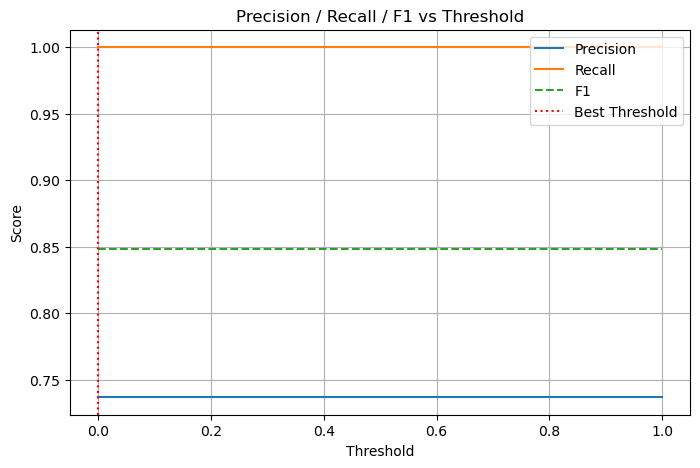

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

lr_model = LogisticRegressionCustom(lr=0.1, n_iter=2000)
lr_model.fit(X_train.values, y_train.values)
y_val_proba = lr_model.predict_proba(X_valid.values)

thresholds = np.linspace(0, 1, 101)
precision_list = []
recall_list = []
f1_list = []

for t in thresholds:
    y_pred_t = (y_val_proba >= t).astype(int)
    precision_list.append(precision_score(y_valid.values, y_pred_t))
    recall_list.append(recall_score(y_valid.values, y_pred_t))
    f1_list.append(f1_score(y_valid.values, y_pred_t))

best_idx = np.argmax(f1_list)
best_threshold = thresholds[best_idx]
print(f"Оптимальный порог по F1: {best_threshold:.2f}, F1 = {f1_list[best_idx]:.3f}")

# График precision/recall vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1', linestyle='--')
plt.axvline(best_threshold, color='red', linestyle=':', label='Best Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision / Recall / F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

lr_model = LogisticRegressionCustom(lr=0.1, n_iter=2000)
lr_model.fit(X_train.values, y_train.values)


y_test_pred_lr = lr_model.predict(X_test.values, threshold=best_threshold)
y_test_proba_lr = lr_model.predict_proba(X_test.values)


accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
precision_lr = precision_score(y_test, y_test_pred_lr)
recall_lr = recall_score(y_test, y_test_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_test_proba_lr)
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)

print(" Logistic Regression TEST metrics:")
print(f"Accuracy: {accuracy_lr:.3f}")
print(f"Precision: {precision_lr:.3f}")
print(f"Recall: {recall_lr:.3f}")
print(f"ROC-AUC: {roc_auc_lr:.3f}")
print("Confusion Matrix:")
print(conf_matrix_lr)


 Logistic Regression TEST metrics:
Accuracy: 0.700
Precision: 0.700
Recall: 1.000
ROC-AUC: 0.500
Confusion Matrix:
[[ 0  6]
 [ 0 14]]


/var/folders/96/pccrrdwj3nx7vlyr3xlcp_j40000gn/T/ipykernel_16122/2141906486.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
